In [1]:
import requests
from bs4 import BeautifulSoup as bs
import re

In [2]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
redmi_reviews = []

In [5]:
for i in range (1,31):
  ip=[]
  url = "https://www.amazon.in/Redmi-Pro-Blue-64GB-Storage/product-reviews/B07DJHR5DY/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber="+str(i)
  response = requests.get(url)
  soup = bs(response.content,"html.parser")
  reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
  for i in range(len(reviews)):
    ip.append(reviews[i].text)
    redmi_reviews = redmi_reviews+ip

In [6]:
red_rev_string = "".join(redmi_reviews)

In [9]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [10]:
tokenize_sent = sent_tokenize(red_rev_string)

In [11]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [13]:
nltk.download('stopwords')
a = stopwords.words('english')
wordnet = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
filtered_split=[]
for i in range(len(tokenize_sent)):
  review = re.sub("[^A-Za-z""]+","",tokenize_sent[i])
  review = re.sub("[0-9""]+","",tokenize_sent[i])
  review = review.lower()
  review = review.split()
  nltk.download('wordnet')
  review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
  review = ''.join(review)
  filtered_split.append(review)

Streaming output truncated to the last 5000 lines.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading packa

In [18]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
tf = TfidfVectorizer()
text_tf = tf.fit_transform(filtered_split)
feature_names = tf.get_feature_names()
dense = text_tf.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist,columns= feature_names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [20]:
cloud = ",".join(df)

In [21]:
wordcloud = WordCloud(background_color='black',width=1800,height=1400).generate(cloud)

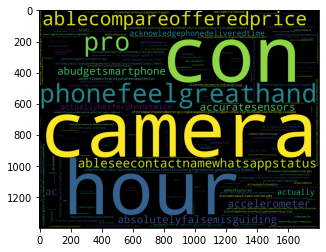

In [22]:
plt.imshow(wordcloud)